Assignment 3
The goal of the assignment is to implement and analyze numerical methods

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

1. Plot f(x)


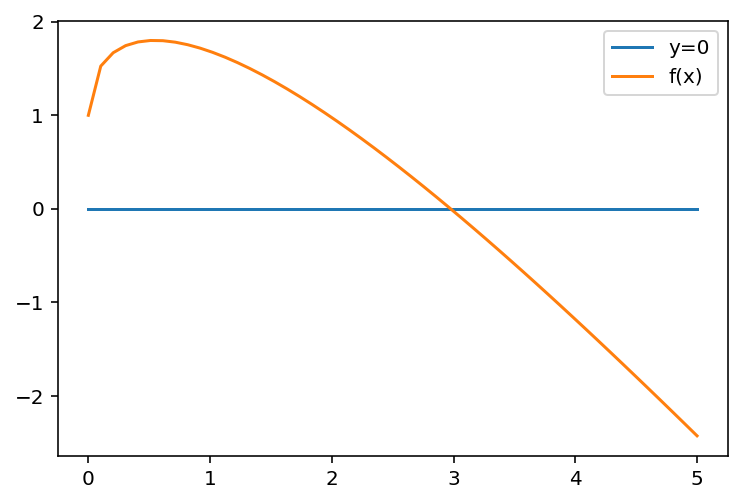

In [22]:
def f(x):
    return 2*np.sin(np.sqrt(x))-x+1
def g(x): 
    return 2*np.sin(np.sqrt(x))+1
def df(x):
    if (x == 0):
        print ("Invalid argument!")
        return 0
    return np.cos(np.sqrt(x)) * 1/np.sqrt(x) - 1    
X = np.linspace(0,5)
Y = [0 for x in X]
plt.plot(X, Y, label='y=0')

X = np.linspace(0,5)
Y = [f(x) for x in X]
plt.plot(X, Y, label='f(x)')

plt.legend()
print("1. Plot f(x)")
plt.show()

In [10]:
#pass function, starting point, end point, tolerance and max number of iterations
def bisection(func, l, r, tol, nmax):
    x = 0.0
    I = []
    E = []
    X = []
    for i in range(nmax):
        x_old = x
        x = (l+r)/2
        if ( x!= 0.0 ):    
            e = abs((x-x_old)/x)*100
        E.append(e)
        X.append(x)
        I.append(i)
        if ((func(x) == 0) or ((r - l)/2 < tol)):
            break
        if np.sign(func(x)) == np.sign(func(l)):
            l = x
        else:
            r = x
    return I, X, E

#pass function, starting point, end point, tolerance and max number of iterations
def falseposition(func, l, r, tol, nmax):
    x = 0.0
    I = []
    E = []
    X = []
    for i in range(nmax):
        xold=x
        #x is set to the intersection between secant line and y = 0
        x=r-func(r)*(l-r)/(func(l)-func(r))
        if (x != 0.0):
            e=abs((x-xold)/x)*100
        I.append(i)
        X.append(x)
        E.append(e)
        temp = func(l)*func(x)
        # if signs of f at left point and at intersection of secant and y = 0 are equal, root at the left side else at the right side
        if (temp < 0.0):
            r = x
        elif (temp > 0.0):
            l = x
        else:
            e = 0.0
        if (e < tol):
            break
    return I, X, E

#pass fixed point function, with point = 0, tolerance and max number of iterations
def fixed_point(g_func,guess,tol,nmax):
    x = guess
    X = []
    E = []
    I = []
    for i in range(nmax):
        xold=x
        x=g_func(x)
        if (x!=0):
            e=abs((x-xold)/x)*100
        I.append(i)
        X.append(x)
        E.append(e)
        if (e < tol):
            break
    return I,X,E

# pass function, derivative of a function, initial guess, tolerance and max number of iterations
def newton_raphson(func,d_func,guess,tol,nmax):
    x=guess
    X=[]
    E=[]
    I=[]
    for i in range(nmax):
        xold=x
#       equation of the line f(x) = df(x)(xold-x), so:
        x=xold-func(xold)/d_func(xold)
        if (x!=0):
            e=abs((x-xold)/x)*100
        I.append(i)
        X.append(x)
        E.append(e)
        if (e < tol):
            break
    return I,X,E

In [11]:
I1,X1,E1 = bisection(f,0,5,1e-10, 100)
I2,X2,E2 = falseposition(f, 0,5,1e-10, 100)
I3,X3,E3 = fixed_point(g, 1, 1e-10, 100)
I4,X4,E4 = newton_raphson(f, df, 1, 1e-10, 100)

In [27]:
print("Roots:")
print("2. Bisection: "+str(X1[-1]))
print("3. False position: "+str(X2[-1]))
print("4. Fixed-point: "+str(X3[-1]))
print("5. Newton-Raphson: "+str(X4[-1]))

Roots:
2. Bisection: 2.976215688031516
3. False position: 2.97621568804
4. Fixed-point: 2.97621568804
5. Newton-Raphson: 2.97621568804


6. Plot error's iterations


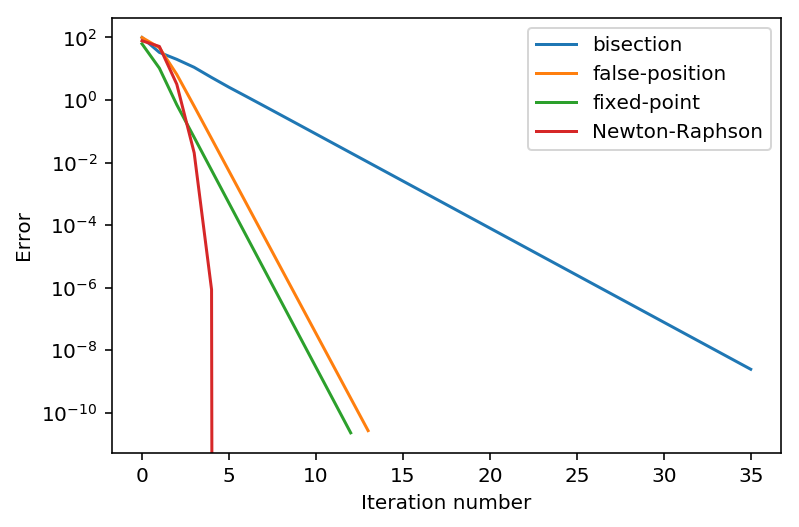

In [34]:
plt.plot(I1, E1, label="bisection")
plt.plot(I2, E2, label="false-position")
plt.plot(I3, E3, label="fixed-point")
plt.plot(I4, E4, label="Newton-Raphson")

plt.legend(); 
plt.xlabel("Iteration number")
plt.ylabel("Error"); 
plt.yscale('log'); 
print("6. Plot error's iterations")
plt.show()

In [19]:
%timeit I1,X1,E1=bisection(f,0,5,1e-10, 100)

1000 loops, best of 3: 726 µs per loop


In [20]:
%timeit I2,X2,E2=falseposition(f, 0,5,1e-10, 100)

1000 loops, best of 3: 426 µs per loop


In [21]:
%timeit I3,X3,E3=fixed_point(g, 1, 1e-10, 100)

10000 loops, best of 3: 95.3 µs per loop


In [18]:
%timeit I4,X4,E4=newton_raphson(f, df, 1, 1e-10, 100)

10000 loops, best of 3: 92.7 µs per loop


7 The rate of convergence is 1/10 for each iteration

In [44]:
print("8. Maximum precisions:")
print(" Bisection: "+str(E1[-1]))
print(" False position: "+str(E2[-1]))
print(" Fixed-point: "+str(E3[-1]))
print(" Newton-Raphson: "+str(E4[-2]))

8. Maximum precisions:
 Bisection: 2.4447010488664486e-09
 False position: 2.66344688245e-11
 Fixed-point: 2.26504894541e-11
 Newton-Raphson: 8.64416731838e-07


9 The fastest is Newtons Method 927000 µs